In [1]:
import pandas as pd
import numpy as np
import dateutil
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
#Aesthetics
sns.set_style("darkgrid")
%matplotlib inline
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [3]:
tel=pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\Telecom_analysis\data\Week1_challenge_data_source(CSV).csv')
tel.head()

Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0  9.16456699548519E+015             42.0              5.0   
1                L77566A             65.0              5.0   
2                D42335A              NaN              NaN   
3                T21824A              NaN              NaN   
4                D88865A              NaN              NaN   

   Avg Bearer TP DL (kbps)  Avg Bearer TP UL (kbps)  \
0                     23.0                     44.0   
1                     16.0                     26.0   
2                      6.0                      9.0   
3                     44.0                     44.0   
4                      6.0                      9.0   

   TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   DL TP < 50 Kbps (%)  50 Kbps < DL TP < 250 Kbps (%)  \
0                100.0                             0.0   
1                100.0                             0.0   
2                100.0                             0.0   
3                100.0                             0.0   
4                100.0                             0.0   

   250 Kbps < DL TP < 1 Mbps (%)  DL TP > 1 Mbps (%)  UL TP < 10 Kbps (%)  \
0                            0.0                 0.0                100.0   
1                            0.0                 0.0                100.0   
2                            0.0                 0.0                100.0   
3                            0.0                 0.0                100.0   
4                            0.0                 0.0                100.0   

   10 Kbps < UL TP < 50 Kbps (%)  50 Kbps < UL TP < 300 Kbps (%)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   UL TP > 300 Kbps (%)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0                   0.0              NaN              NaN   
1                   0.0              NaN              NaN   
2                   0.0              NaN              NaN   
3                   0.0              NaN              NaN   
4                   0.0              NaN              NaN   

   Activity Duration DL (ms)  Activity Duration UL (ms)   Dur. (ms).1  \
0                    37624.0                    38787.0  1.823653e+09   
1                      168.0                     3560.0  1.365104e+09   
2                        0.0                        0.0  1.361763e+09   
3                     3330.0                    37882.0  1.321510e+09   
4                        0.0                        0.0  1.089009e+09   

  Handset Manufacturer                 Handset Type  \
0              Samsung   Samsung Galaxy A5 Sm-A520F   
1   

In [4]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(tel)

The telecom dataset contains 12.5 % missing values.


In [5]:
tel['TCP DL Retrans. Vol (Bytes)'].fillna(value=tel['TCP DL Retrans. Vol (Bytes)'].mean(), inplace=True)
tel['TCP UL Retrans. Vol (Bytes)'].fillna(value=tel['TCP UL Retrans. Vol (Bytes)'].mean(), inplace=True)

In [6]:
# drop columns with more than 30% missing values
NA_val = tel.isna().sum()
def na_filter(na, threshold = .3): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/tel.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
tel = tel[na_filter(NA_val)]

In [7]:
tel['Avg RTT DL (ms)'].fillna(value=tel['Avg RTT DL (ms)'].mean(), inplace=True)
tel['Avg RTT UL (ms)'].fillna(value=tel['Avg RTT UL (ms)'].mean(), inplace=True)

In [8]:
tel = tel.dropna()

In [79]:
def format_float(value):
    return f'{value:,.2f}'
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def total_column(col_1,col_2):
    new_col = col_1+col_2
    return new_col 
def average_column(col_1,col_2):
    new_col = (col_1+col_2)/2
    return new_col 

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]
def sort_column(df,col1,col2):
        user_agg2 = df[[col1,col2]]
        sorted_data = user_agg2.sort_values(by=col2,ascending=False)
        return sorted_data

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df
pd.options.display.float_format = format_float

In [10]:
tel['Social_media_total']= total_column(tel['Social Media DL (Bytes)'],tel['Social Media UL (Bytes)'])
tel['Google_total']= total_column(tel['Google DL (Bytes)'],tel['Google UL (Bytes)'])
tel['Email_total']= total_column(tel['Email DL (Bytes)'],tel['Email UL (Bytes)'])
tel['Youtube_total']= total_column(tel['Youtube DL (Bytes)'],tel['Youtube UL (Bytes)'])
tel['Netflix_total']= total_column(tel['Netflix DL (Bytes)'],tel['Netflix UL (Bytes)'])
tel['Gaming_total']= total_column(tel['Gaming DL (Bytes)'],tel['Gaming UL (Bytes)'])
tel['Other_total']= total_column(tel['Other DL (Bytes)'],tel['Other UL (Bytes)'])
tel['total']= total_column(tel['Total DL (Bytes)'],tel['Total UL (Bytes)'])
tel['TCP_Avg']=average_column(tel['TCP DL Retrans. Vol (Bytes)'],tel['TCP UL Retrans. Vol (Bytes)'])
tel['RTT_Avg']=average_column(tel['Avg RTT DL (ms)'],tel['Avg RTT UL (ms)'])
tel['Thru_put_Avg']=average_column(tel['Avg Bearer TP DL (kbps)'],tel['Avg Bearer TP UL (kbps)'])

In [11]:
tel['Social_media_total']=convert_bytes_to_megabytes(tel,'Social_media_total')
tel['Google_total']=convert_bytes_to_megabytes(tel,'Google_total')
tel['Email_total']=convert_bytes_to_megabytes(tel,'Email_total')
tel['Youtube_total']=convert_bytes_to_megabytes(tel,'Youtube_total')
tel['Netflix_total']=convert_bytes_to_megabytes(tel,'Netflix_total')
tel['Gaming_total']=convert_bytes_to_megabytes(tel,'Gaming_total')
tel['Other_total']=convert_bytes_to_megabytes(tel,'Other_total')
tel['total']=convert_bytes_to_megabytes(tel,'total')
tel['TCP_Avg'] = convert_bytes_to_megabytes(tel,'TCP_Avg')

In [12]:
task_data = tel.groupby(['MSISDN/Number','Handset Type']).agg({'Bearer Id':'count','Dur. (ms).1':'sum',
                                                               'Social_media_total':'sum','Google_total':'sum',
                                                               'Email_total':'sum','Youtube_total':'sum',
                                                               'Netflix_total':'sum','Gaming_total':'sum',
                                                               'Other_total':'sum','total':'sum',
                                                               'TCP_Avg':'sum','RTT_Avg':'sum',
                                                               'Thru_put_Avg':'sum'}).reset_index()
task_data

MSISDN/Number                    Handset Type  Bearer Id  \
0           33,601,001,722.00  Huawei P20 Lite Huawei Nova 3E          1   
1           33,601,001,754.00          Apple iPhone 7 (A1778)          1   
2           33,601,002,511.00                       undefined          1   
3           33,601,007,832.00         Apple iPhone 5S (A1457)          1   
4           33,601,008,617.00         Apple iPhone Se (A1723)          2   
...                       ...                             ...        ...   
105720      33,789,967,113.00         Apple iPhone 6S (A1688)          1   
105721      33,789,980,299.00                       undefined          2   
105722      33,789,996,170.00             Huawei Honor 9 Lite          1   
105723      33,789,997,247.00     Apple iPhone 8 Plus (A1897)          1   
105724 337,000,037,000,919.00                Huawei B525S-23A          1   

          Dur. (ms).1  Social_media_total  Google_total  Email_total  \
0      116,720,140.00                2.23          4.39         1.33   
1      181,230,963.00                2.66          5.33         3.31   
2      134,969,374.00                3.20          3.44         3.21   
3       49,878,024.00                0.28          9.68         2.28   
4       37,104,453.00                2.91         18.50         3.31   
...               ...                 ...           ...          ...   
105720 160,461,578.00                1.41          9.89         3.40   
105721 210,390,146.00                4.25         10.25         5.32   
105722   8,810,688.00                0.30          7.53         1.01   
105723 140,988,659.00                0.50          5.43         2.51   
105724 253,030,201.00                0.52          9.83         3.32   

        Youtube_total  Netflix_total  Gaming_total  Other_total    total  \
0               21.62          27.18        812.46       386.57   878.69   
1               12.43          11.22        119.75       281.71   156.86   
2               21.33          19.35        538.83       501.69   595.97   
3                6.98           1.94        391.13        35.28   422.32   
4               41.53          49.20      1,314.80       804.80 1,457.41   
...               ...            ...           ...          ...      ...   
105720          28.23          30.37        134.82       408.11   208.12   
105721          38.01          51.95        972.34     1,075.14 1,094.69   
105722          26.65          14.90        660.36       295.28   714.64   
105723          19.85           8.53        437.00       211.12   480.31   
105724          36.73          30.91        510.14       149.19   596.29   

        TCP_Avg  RTT_Avg  Thru_put_Avg  
0         10.78    23.00         38.00  
1         10.78    15.50         49.50  
2         10.78    63.73         48.50  
3          0.38    42.00        124.00  
4         15.47    59.50     28,422.00  
...         ...      ...           ...  
105720    10.78    26.50         33.50  
105721    10.79    98.23     81,539.50  
105722     0.11    26.00      5,182.50  
105723    10.78    20.00         58.00  
105724    10.78    63.73         16.50  

[105725 rows x 15 columns]

In [13]:
task_data['Dur. (ms).1'] =fix_outlier(task_data,'Dur. (ms).1')
task_data['Social_media_total']=fix_outlier(task_data,'Social_media_total')
task_data['Google_total']=fix_outlier(task_data,'Google_total')
task_data['Email_total']=fix_outlier(task_data,'Email_total')
task_data['Youtube_total']=fix_outlier(task_data,'Youtube_total')
task_data['Netflix_total']=fix_outlier(task_data,'Netflix_total')
task_data['Gaming_total']=fix_outlier(task_data,'Gaming_total')
task_data['Other_total']=fix_outlier(task_data,'Other_total')
task_data['total']=fix_outlier(task_data,'total')
task_data['TCP_Avg']=fix_outlier(task_data,'TCP_Avg')
task_data['RTT_Avg']=fix_outlier(task_data,'RTT_Avg')
task_data['Thru_put_Avg']=fix_outlier(task_data,'Thru_put_Avg')

In [14]:
task_data.shape

(105725, 15)

In [15]:

task_data.rename(columns = {'Bearer_Id':'No_of_xDRsessions'}, inplace = True)
task_data.sample()

MSISDN/Number       Handset Type  Bearer Id    Dur. (ms).1  \
59935 33,665,587,834.00  Samsung Galaxy J6          1 162,775,162.00   

       Social_media_total  Google_total  Email_total  Youtube_total  \
59935                0.57          7.69         2.51          25.30   

       Netflix_total  Gaming_total  Other_total  total  TCP_Avg  RTT_Avg  \
59935          21.85        313.97       804.81 378.43    10.78    63.73   

       Thru_put_Avg  
59935         48.50

TASK 2

In [16]:
number_of_xDRsessions=task_data.groupby('MSISDN/Number', as_index=False).agg({"Bearer Id": "count"}).sort_values('Bearer Id', ascending= False)[:10]
number_of_xDRsessions

MSISDN/Number  Bearer Id
87773 33,699,477,814.00          2
81208 33,687,324,867.00          2
78248 33,681,315,804.00          2
341   33,601,918,631.00          2
25954 33,650,772,537.00          2
28769 33,658,030,496.00          2
0     33,601,001,722.00          1
70485 33,669,150,040.00          1
70484 33,669,149,969.00          1
70483 33,669,149,749.00          1

In [17]:
sssiond=task_data.groupby('MSISDN/Number', as_index=False).agg({"Dur. (ms).1": "sum"}).sort_values('Dur. (ms).1', ascending= False)[:10]
sssiond

MSISDN/Number    Dur. (ms).1
81208  33,687,324,867.00 425,994,236.00
7329   33,616,481,958.00 369,125,049.00
29854  33,658,249,160.00 369,114,356.00
100851 33,769,198,053.00 369,106,216.00
28638  33,658,003,695.00 369,053,982.00
86252  33,699,003,043.00 369,013,070.00
98995  33,763,594,265.00 369,002,090.00
95227  33,761,762,271.00 368,979,101.00
24664  33,650,474,882.00 368,931,907.00
54578  33,664,100,862.00 368,915,462.00

In [18]:
traffic=task_data.groupby('MSISDN/Number',as_index=False).agg({'total':'sum'}).sort_values('total', ascending= False)[:10]
traffic

MSISDN/Number    total
38414 33,660,139,559.00 1,592.52
51849 33,663,374,648.00 1,592.31
31045 33,658,499,877.00 1,592.29
43603 33,661,413,376.00 1,592.24
4364  33,611,707,536.00 1,592.21
11370 33,623,033,596.00 1,592.11
40303 33,660,596,342.00 1,592.06
98167 33,763,197,008.00 1,591.82
99873 33,766,898,828.00 1,591.77
46754 33,662,138,570.00 1,591.52

2.1.2

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [20]:
scaler = StandardScaler()
Stand_exp_metrics=scaler.fit_transform(task_data[['Bearer Id','Dur. (ms).1','total']])

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
exp_principalComponents = pca.fit_transform(Stand_exp_metrics)

In [58]:
Kmean = KMeans(n_clusters=3)
cluster =Kmean.fit_predict(exp_principalComponents)
cluster

array([0, 2, 2, ..., 0, 2, 2])

In [59]:
task_data['engagement_clusters']=cluster

In [90]:
data['engagement_clusters']=cluster

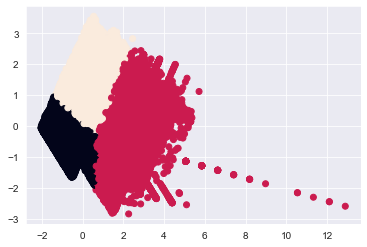

In [61]:
plt.scatter(exp_principalComponents[:,0],exp_principalComponents[:,1],c=cluster)
plt.show()

In [25]:
'''def Kmeans(df,column,n,title):
    kmeans=KMeans(n_clusters=n)
    data=task_data.copy()
    data[columns]=StandardScaler().fit_transform(data[columns])
    cluster=kmeans.fit_predict(data[columns])
    df[title]=cluster
    
    return df'''
    

'def Kmeans(df,column,n,title):\n    kmeans=KMeans(n_clusters=n)\n    data=task_data.copy()\n    data[columns]=StandardScaler().fit_transform(data[columns])\n    cluster=kmeans.fit_predict(data[columns])\n    df[title]=cluster\n    \n    return df'

In [26]:
'''columns=['Bearer Id','Dur. (ms).1','total']
Kmeans(task_data,columns,3,'engagement_clusters')'''

"columns=['Bearer Id','Dur. (ms).1','total']\nKmeans(task_data,columns,3,'engagement_clusters')"

2.1.3

In [27]:
engagement_metrics=task_data.groupby('engagement_clusters').agg({'Bearer Id':['min','mean','max','sum'],
'Dur. (ms).1':['min','mean','max','sum'],
'total':['min','mean','max','sum']})
engagement_metrics

Bearer Id                   Dur. (ms).1                 \
                          min mean max    sum           min           mean   
engagement_clusters                                                          
0                           1 1.05   2  61422  7,142,988.00  70,139,835.88   
1                           1 1.15   3  29126 92,224,819.00 181,440,191.16   
2                           2 2.57  18  56343 18,235,797.00 181,300,593.96   

                                                         total           \
                               max                  sum    min     mean   
engagement_clusters                                                       
0                   150,784,632.00 4,097,008,093,499.00  33.25   521.66   
1                   369,013,070.00 4,605,677,812,308.00  33.58   463.85   
2                   369,125,049.00 3,975,740,724,860.00 377.75 1,028.38   

                                            
                         max           sum  
engagement_clusters                         
0                   1,074.09 30,470,972.78  
1                     949.17 11,774,388.91  
2                   1,592.52 22,551,303.86

2.1.4

In [28]:
'''top10_socialmedia=task_data.groupby('MSISDN/Number', as_index=False).agg({"Social_media_total": ""}).sort_values('Social_media_total', ascending= False)[:10]
top10_socialmedia'''

'top10_socialmedia=task_data.groupby(\'MSISDN/Number\', as_index=False).agg({"Social_media_total": ""}).sort_values(\'Social_media_total\', ascending= False)[:10]\ntop10_socialmedia'

2.1.5

In [29]:
application_trafic = task_data[['Social_media_total','Google_total','Email_total','Youtube_total','Netflix_total','Gaming_total','Other_total']]
application_trafic

Social_media_total  Google_total  Email_total  Youtube_total  \
0                     2.23          4.39         1.33          21.62   
1                     2.66          5.33         3.31          12.43   
2                     3.20          3.44         3.21          21.33   
3                     0.28          9.68         2.28           6.98   
4                     2.91         18.50         3.31          41.53   
...                    ...           ...          ...            ...   
105720                1.41          9.89         3.40          28.23   
105721                4.25         10.25         5.32          38.01   
105722                0.30          7.53         1.01          26.65   
105723                0.50          5.43         2.51          19.85   
105724                0.52          9.83         3.32          36.73   

        Netflix_total  Gaming_total  Other_total  
0               27.18        812.46       386.57  
1               11.22        119.75       281.71  
2               19.35        538.83       501.69  
3                1.94        391.13        35.28  
4               49.20      1,314.80       804.80  
...               ...           ...          ...  
105720          30.37        134.82       408.11  
105721          51.95        972.34     1,075.14  
105722          14.90        660.36       295.28  
105723           8.53        437.00       211.12  
105724          30.91        510.14       149.19  

[105725 rows x 7 columns]

In [30]:
application_totals = application_trafic.sum(axis=0)
application_totals

Social_media_total      238,204.12
Google_total          1,021,111.93
Email_total             295,097.27
Youtube_total         2,960,618.40
Netflix_total         2,959,282.84
Gaming_total         56,048,171.89
Other_total          55,876,354.14
dtype: float64

In [31]:
social = pd.DataFrame(application_totals)
social

0
Social_media_total    238,204.12
Google_total        1,021,111.93
Email_total           295,097.27
Youtube_total       2,960,618.40
Netflix_total       2,959,282.84
Gaming_total       56,048,171.89
Other_total        55,876,354.14

In [32]:
top3_social= social.sort_values(by = 0 , ascending= False)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Gaming_total'),
  Text(1, 0, 'Other_total'),
  Text(2, 0, 'Youtube_total'),
  Text(3, 0, 'Netflix_total'),
  Text(4, 0, 'Google_total'),
  Text(5, 0, 'Email_total'),
  Text(6, 0, 'Social_media_total')])

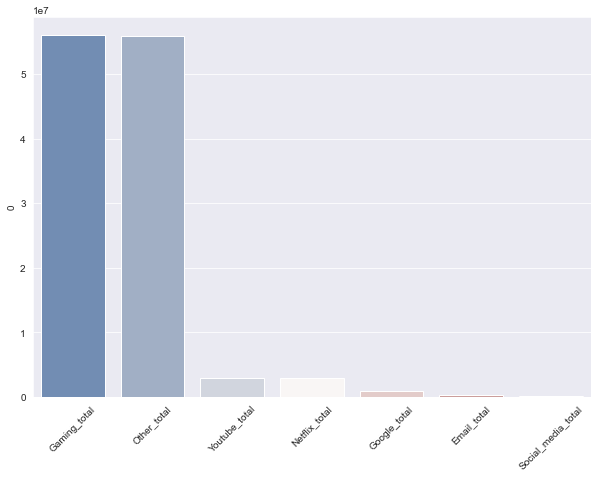

In [33]:
plt.figure(figsize=(10,7))
sns.barplot(x=top3_social.index,y=top3_social[0],palette='vlag')
plt.xticks(rotation =45)

In [34]:
def Elbow(df,column):
    wcss = []
    for i in range(1,11):
        km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
        data=task_data.copy()
        data[columns]=StandardScaler().fit_transform(data[columns])
        km.fit(data[columns])
        wcss.append(km.inertia_)
    plt.plot(range(1,11),wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('wcss')
    plt.show()
    

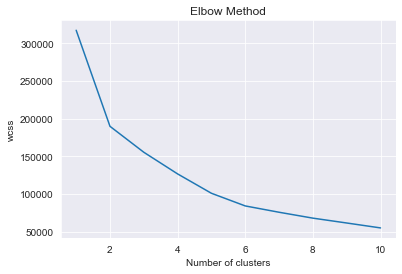

In [35]:
columns=['Bearer Id','Dur. (ms).1','total']
Elbow(task_data,columns)

TASK 3

In [36]:
RTT_avg=task_data.groupby('MSISDN/Number', as_index=False).agg({"RTT_Avg": "sum"}).sort_values('RTT_Avg', ascending= False)[:10]
RTT_avg

MSISDN/Number  RTT_Avg
99849  33,766,169,346.00   233.00
85013  33,698,617,234.00   233.00
58380  33,665,169,149.00   233.00
103130 33,781,738,823.00   233.00
67912  33,668,279,872.00   233.00
42381  33,661,092,763.00   233.00
101288 33,769,918,633.00   233.00
43255  33,661,323,955.00   233.00
825    33,603,412,193.00   233.00
72344  33,669,926,831.00   233.00

In [37]:
Thru_avg=task_data.groupby('MSISDN/Number', as_index=False).agg({"Thru_put_Avg": "sum"}).sort_values('Thru_put_Avg', ascending= False)[:10]
Thru_avg

MSISDN/Number  Thru_put_Avg
87773 33,699,477,814.00     65,054.50
28688 33,658,014,767.00     49,251.50
47111 33,662,224,746.00     49,251.50
43022 33,661,260,494.00     49,250.50
55811 33,664,466,856.00     49,245.50
20343 33,644,013,792.00     49,241.50
69229 33,668,719,617.00     49,241.00
4658  33,612,153,170.00     49,233.50
67780 33,668,236,739.00     49,229.00
34078 33,659,146,769.00     49,221.00

In [38]:
TCP_avg=task_data.groupby('MSISDN/Number', as_index=False).agg({"TCP_Avg": "sum"}).sort_values('TCP_Avg', ascending= False)[:10]
TCP_avg

MSISDN/Number  TCP_Avg
81208  33,687,324,867.00    35.05
87773  33,699,477,814.00    26.83
37536  33,659,926,126.00    23.16
100595 33,768,726,702.00    23.16
86029  33,698,935,800.00    23.16
103209 33,781,851,327.00    23.15
21779  33,647,795,741.00    23.15
102537 33,780,360,715.00    23.14
77772  33,680,379,869.00    23.13
61030  33,666,012,578.00    23.13

In [39]:
def top(df,col,no:int):
    largest = df.nlargest(no,[col])
    return largest

In [40]:
top(task_data,'Thru_put_Avg',10)

MSISDN/Number             Handset Type  Bearer Id    Dur. (ms).1  \
28690 33,658,014,767.00   Apple iPhone 8 (A1905)          4 131,167,569.00   
47114 33,662,224,746.00             Huawei E5573          2 120,200,721.00   
43025 33,661,260,494.00         Huawei B528S-23A          1 104,694,743.00   
55814 33,664,466,856.00  Apple iPhone Xs (A2097)          1  52,706,101.00   
20344 33,644,013,792.00   Apple iPhone 8 (A1905)          1  86,399,936.00   
69232 33,668,719,617.00  Apple iPhone 6S (A1688)          1  55,699,318.00   
4659  33,612,153,170.00  Apple iPhone Xr (A2105)          2 158,435,554.00   
67783 33,668,236,739.00         Huawei B528S-23A          1  86,399,907.00   
34081 33,659,146,769.00                undefined          1  65,546,978.00   
16810 33,632,977,083.00   Apple iPhone 7 (A1778)          1  86,399,917.00   

       Social_media_total  Google_total  Email_total  Youtube_total  \
28690                2.30          9.57         2.80          26.77   
47114                5.29         15.99         7.15          55.32   
43025                0.65         11.33         3.12          19.53   
55814                1.82         10.61         1.76          28.37   
20344                1.16          7.22         2.14          18.18   
69232                1.60          9.39         0.68          17.37   
4659                 3.72         12.99         2.68          21.87   
67783                1.26         13.95         3.47          24.68   
34081                1.32          4.10         1.14          19.12   
16810                1.98         10.37         3.78          26.37   

       Netflix_total  Gaming_total  Other_total    total  TCP_Avg  RTT_Avg  \
28690          26.69        541.32       538.81   616.92    10.78   132.73   
47114          53.48        862.68     1,308.51 1,020.40     0.34    56.50   
43025          10.83        176.13       248.91   236.51    10.78    99.50   
55814          21.01        774.33        24.78   843.68     0.02    15.00   
20344          30.41        346.79       692.69   417.54     1.64    17.00   
69232           9.59        673.63       116.77   714.63     0.59    26.50   
4659           23.87        954.23     1,017.12 1,048.65    10.88    54.50   
67783          30.36        464.84       777.86   547.81     0.49    44.00   
34081          32.96        592.90       697.74   661.39     0.61    21.50   
16810          13.65        551.82       783.58   611.53     0.11    30.50   

       Thru_put_Avg  engagement_clusters  
28690     49,251.50                    2  
47114     49,251.50                    2  
43025     49,250.50                    0  
55814     49,245.50                    0  
20344     49,241.50                    0  
69232     49,241.00                    0  
4659      49,233.50                    2  
67783     49,229.00                    0  
34081     49,221.00                    0  
16810     49,219.50                    0

In [41]:
top(task_data,'TCP_Avg',10)

MSISDN/Number                  Handset Type  Bearer Id  \
37539  33,659,926,126.00                     undefined          3   
100601 33,768,726,702.00       Apple iPhone Xr (A2105)          3   
86034  33,698,935,800.00              Huawei B528S-23A          5   
103215 33,781,851,327.00        Apple iPhone 6 (A1586)          3   
21780  33,647,795,741.00  Samsung Galaxy S8 (Sm-G950F)          4   
102543 33,780,360,715.00   Apple iPhone 7 Plus (A1784)          4   
77775  33,680,379,869.00  Samsung Galaxy S8 (Sm-G950F)          2   
61033  33,666,012,578.00              Huawei B528S-23A          4   
103688 33,782,544,909.00  Apple iPhone 6S Plus (A1687)          1   
8519   33,618,486,759.00        Apple iPhone 8 (A1905)          3   

          Dur. (ms).1  Social_media_total  Google_total  Email_total  \
37539  368,602,024.00                5.14         17.06         5.61   
100601 103,108,042.00                2.30         20.11         4.55   
86034  103,108,042.00                2.30          9.57         2.80   
103215 357,629,018.00                2.30          9.57         6.93   
21780  103,108,042.00                2.30          9.57         2.80   
102543 103,108,042.00                2.30          9.57         2.80   
77775   93,676,756.00                3.18         19.78         3.10   
61033  328,348,818.00                2.30          9.57         5.96   
103688  86,026,196.00                3.31          9.44         2.58   
8519   272,567,850.00                5.06         21.09         2.80   

        Youtube_total  Netflix_total  Gaming_total  Other_total    total  \
37539           26.77          65.87      1,010.15     1,054.29 1,214.54   
100601          26.77          60.80        971.38       538.81 1,177.33   
86034           26.77          26.69        541.32       538.81   616.92   
103215          26.77          69.48      1,088.03       219.97 1,297.45   
21780           26.77          50.42      1,304.86     1,340.94 1,510.12   
102543          26.77          26.69        541.32       693.33   616.92   
77775           37.07          59.87        977.13       657.38 1,122.19   
61033           26.77          26.69      1,183.81       538.81 1,466.36   
103688          32.80          18.97        305.93       670.20   376.85   
8519            53.79          59.01        541.32     1,193.20   616.92   

        TCP_Avg  RTT_Avg  Thru_put_Avg  engagement_clusters  
37539     23.16    52.50     15,623.50                    2  
100601    23.16    56.00        151.00                    2  
86034     23.16    46.00        151.00                    2  
103215    23.15   183.00      4,627.00                    2  
21780     23.15   232.96        151.00                    2  
102543    23.14    90.00        151.00                    2  
77775     23.13   131.23     10,700.00                    2  
61033     23.13   208.00        151.00                    2  
103688    23.13    28.50     36,285.50                    0  
8519      23.13    52.50        151.00                    2

In [42]:
top(task_data,'RTT_Avg',10)

MSISDN/Number                 Handset Type  Bearer Id  \
826    33,603,412,193.00                    undefined          1   
42384  33,661,092,763.00                 Huawei E5180          5   
43258  33,661,323,955.00             Huawei B528S-23A          3   
58383  33,665,169,149.00             Huawei B528S-23A          1   
67915  33,668,279,872.00  Apple iPhone 8 Plus (A1897)          2   
69728  33,668,907,937.00                 Huawei E5180          3   
72347  33,669,926,831.00       Apple iPhone 7 (A1778)          1   
85018  33,698,617,234.00             Huawei B528S-23A          5   
99855  33,766,169,346.00  Apple iPhone Xs Max (A2101)          1   
101294 33,769,918,633.00       Apple iPhone 6 (A1586)          2   

          Dur. (ms).1  Social_media_total  Google_total  Email_total  \
826     86,134,413.00                1.00         12.73         3.90   
42384  103,108,042.00                5.97          9.57         2.80   
43258  254,761,773.00                1.11         19.95         2.80   
58383   86,399,933.00                1.53          3.62         3.21   
67915  118,521,834.00                5.23         14.17         3.07   
69728  259,199,810.00                2.30         21.53         5.40   
72347   11,290,071.00                1.96          8.75         2.25   
85018  103,108,042.00                2.30          9.57         2.80   
99855   12,754,192.00                3.46          9.74         1.20   
101294  96,831,536.00                3.97         22.44         4.18   

        Youtube_total  Netflix_total  Gaming_total  Other_total    total  \
826             15.91          20.53        425.39       567.26   483.68   
42384           26.77          26.69        541.32       538.81   616.92   
43258           45.26          50.62      1,301.09       538.81 1,435.80   
58383           17.65          19.63        738.25        72.12   800.30   
67915           68.49          25.81      1,149.47     1,265.78 1,277.91   
69728           69.49          49.85        541.32     1,112.14   616.92   
72347           26.49          32.40        707.43       362.54   779.91   
85018           26.77          26.69      1,326.38       538.81   616.92   
99855           29.17          32.80         78.72       527.19   168.32   
101294          35.32          36.33        800.76     1,169.80   921.28   

        TCP_Avg  RTT_Avg  Thru_put_Avg  engagement_clusters  
826        2.51   233.00     10,650.50                    0  
42384     11.69   233.00     39,740.50                    2  
43258      4.22   233.00     26,885.00                    2  
58383     10.78   233.00     24,875.00                    0  
67915     11.76   233.00        610.00                    2  
69728     10.78   233.00     21,422.00                    2  
72347      0.02   233.00        286.00                    0  
85018     10.78   233.00        151.00                    2  
99855      1.75   233.00      6,787.50                    0  
101294    21.19   233.00         98.50                    2

In [43]:
def small(df,col,no:int):
    small = df.nsmallest(no,[col])
    return small

In [44]:
small(task_data,'TCP_Avg',10)

MSISDN/Number                            Handset Type  Bearer Id  \
23218  33,650,128,412.00                 Apple iPhone 5S (A1457)          1   
6276   33,614,777,138.00                     Huawei Ascend Mate7          1   
95963  33,762,062,356.00                  Apple iPhone 8 (A1905)          1   
13402  33,626,357,513.00                  Apple iPhone 7 (A1778)          1   
2145   33,607,833,304.00                 Apple iPhone 5C (A1529)          1   
25586  33,650,681,239.00               Xiaomi Communica. Mi Max3          1   
101126 33,769,636,458.00                 Apple iPhone 5S (A1457)          1   
104661 33,784,203,839.00                 Apple iPhone Xr (A2108)          1   
77285  33,679,366,089.00        Samsung Galaxy S6 Plus (Sm-G928)          1   
88469  33,699,694,715.00  Samsung Galaxy Trend Lite 2 (Sm-G318X)          1   

          Dur. (ms).1  Social_media_total  Google_total  Email_total  \
23218  156,027,776.00                1.51          3.76         2.30   
6276    30,375,383.00                1.75          1.33         3.52   
95963   25,990,889.00                3.18          7.83         2.83   
13402   52,056,979.00                1.08          5.73         3.55   
2145    26,838,463.00                3.30         10.99         0.72   
25586   11,078,721.00                2.55         12.62         3.43   
101126  12,067,607.00                1.72         11.87         2.24   
104661  86,400,055.00                3.56          9.02         2.03   
77285   73,085,764.00                1.98          4.90         1.29   
88469   86,397,251.00                1.60          9.41         3.10   

        Youtube_total  Netflix_total  Gaming_total  Other_total  total  \
23218           29.98          22.15        520.08       723.37 583.90   
6276            11.75          16.08        536.14       340.22 575.81   
95963           21.07          24.46        336.30       740.97 398.69   
13402           37.38          31.60        272.55       226.79 366.36   
2145            21.80          11.73        359.10        36.63 423.56   
25586           24.32          19.82        557.35        69.70 627.80   
101126          17.11          29.25         42.78       388.93 112.20   
104661          17.96          21.75         63.94       802.59 122.66   
77285           38.60           9.60        262.20       694.04 334.11   
88469           19.45          14.26        293.26       534.89 352.78   

        TCP_Avg  RTT_Avg  Thru_put_Avg  engagement_clusters  
23218      0.00    24.00     15,290.50                    1  
6276       0.00    32.00      4,327.00                    0  
95963      0.00    20.50     16,288.50                    0  
13402      0.00    20.00      5,482.00                    0  
2145       0.00    16.00      8,426.50                    0  
25586      0.00    26.00      3,519.50                    0  
101126     0.00    16.00      6,105.00                    0  
104661     0.00    37.00      2,948.50                    0  
77285      0.00    19.50     17,534.00                    0  
88469      0.00    84.50         84.50                    0

In [45]:
def freq(df,col,by:int):
    df = df[[col]].value_counts()[:by]
    return df
    

In [46]:
freq(task_data,'TCP_Avg',10)

TCP_Avg
10.78      52031
21.57       7357
10.41        363
10.41        161
0.38         145
21.19         82
10.41         79
0.38          76
0.38          74
0.38          69
dtype: int64

In [ ]:
Handset_grp = task_data.groupby(['Handset Type']).agg({'TCP_Avg':'mean','Thru_put_Avg': 'mean'}).sort_values(['Thru_put_Avg','TCP_Avg'], ascending= False)[:10]
Handset_grp

Because part of our metrics include categorical data we have to encode it 

In [48]:
data = pd.get_dummies(task_data,columns=['Handset Type'])
data

MSISDN/Number  Bearer Id    Dur. (ms).1  Social_media_total  \
0           33,601,001,722.00          1 116,720,140.00                2.23   
1           33,601,001,754.00          1 181,230,963.00                2.66   
2           33,601,002,511.00          1 134,969,374.00                3.20   
3           33,601,007,832.00          1  49,878,024.00                0.28   
4           33,601,008,617.00          2  37,104,453.00                2.91   
...                       ...        ...            ...                 ...   
105720      33,789,967,113.00          1 160,461,578.00                1.41   
105721      33,789,980,299.00          2 210,390,146.00                4.25   
105722      33,789,996,170.00          1   8,810,688.00                0.30   
105723      33,789,997,247.00          1 140,988,659.00                0.50   
105724 337,000,037,000,919.00          1 253,030,201.00                0.52   

        Google_total  Email_total  Youtube_total  Netflix_total  Gaming_total  \
0               4.39         1.33          21.62          27.18        812.46   
1               5.33         3.31          12.43          11.22        119.75   
2               3.44         3.21          21.33          19.35        538.83   
3               9.68         2.28           6.98           1.94        391.13   
4              18.50         3.31          41.53          49.20      1,314.80   
...              ...          ...            ...            ...           ...   
105720          9.89         3.40          28.23          30.37        134.82   
105721         10.25         5.32          38.01          51.95        972.34   
105722          7.53         1.01          26.65          14.90        660.36   
105723          5.43         2.51          19.85           8.53        437.00   
105724          9.83         3.32          36.73          30.91        510.14   

        Other_total    total  TCP_Avg  RTT_Avg  Thru_put_Avg  \
0            386.57   878.69    10.78    23.00         38.00   
1            281.71   156.86    10.78    15.50         49.50   
2            501.69   595.97    10.78    63.73         48.50   
3             35.28   422.32     0.38    42.00        124.00   
4            804.80 1,457.41    15.47    59.50     28,422.00   
...             ...      ...      ...      ...           ...   
105720       408.11   208.12    10.78    26.50         33.50   
105721     1,075.14 1,094.69    10.79    98.23        151.00   
105722       295.28   714.64     0.11    26.00      5,182.50   
105723       211.12   480.31    10.78    20.00         58.00   
105724       149.19   596.29    10.78    63.73         16.50   

        engagement_clusters  Handset Type_A-Link Telecom I. Cubot A5  \
0                         0                                        0   
1                         1                                        0   
2                         1                                        0   
3                         0                                        0   
4                         2                                        0   
...                     ...                                      ...   
105720                    1                                        0   
105721                    2                                        0   
105722                    0                                        0   
105723                    1                                        0   
105724                    1                                        0   

        Handset Type_A-Link Telecom I. Cubot Note Plus  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
105720                                               0

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Stand_engagement_metrics=scaler.fit_transform(data)

In [50]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(Stand_engagement_metrics)

In [51]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
cluster =Kmean.fit_predict(principalComponents)
cluster

array([0, 0, 0, ..., 2, 0, 0])

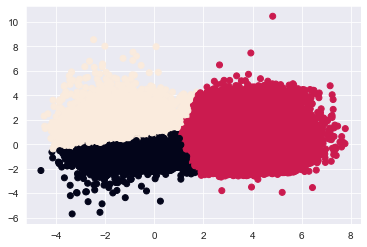

In [52]:
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=cluster)
plt.show()

In [73]:
task_data['experence cluster']=cluster

In [92]:
data['experence cluster']=cluster

In [54]:

engagement_met=data.groupby('experence cluster', as_index=False).agg({'TCP_Avg':np.mean,'RTT_Avg':np.mean,'Thru_put_Avg':np.mean})
engagement_met

experence cluster  TCP_Avg  RTT_Avg  Thru_put_Avg
0                  0    10.29    36.73        484.71
1                  1    13.95    81.88     10,535.93
2                  2     2.54    56.78     13,368.63

In [55]:
data

MSISDN/Number  Bearer Id    Dur. (ms).1  Social_media_total  \
0           33,601,001,722.00          1 116,720,140.00                2.23   
1           33,601,001,754.00          1 181,230,963.00                2.66   
2           33,601,002,511.00          1 134,969,374.00                3.20   
3           33,601,007,832.00          1  49,878,024.00                0.28   
4           33,601,008,617.00          2  37,104,453.00                2.91   
...                       ...        ...            ...                 ...   
105720      33,789,967,113.00          1 160,461,578.00                1.41   
105721      33,789,980,299.00          2 210,390,146.00                4.25   
105722      33,789,996,170.00          1   8,810,688.00                0.30   
105723      33,789,997,247.00          1 140,988,659.00                0.50   
105724 337,000,037,000,919.00          1 253,030,201.00                0.52   

        Google_total  Email_total  Youtube_total  Netflix_total  Gaming_total  \
0               4.39         1.33          21.62          27.18        812.46   
1               5.33         3.31          12.43          11.22        119.75   
2               3.44         3.21          21.33          19.35        538.83   
3               9.68         2.28           6.98           1.94        391.13   
4              18.50         3.31          41.53          49.20      1,314.80   
...              ...          ...            ...            ...           ...   
105720          9.89         3.40          28.23          30.37        134.82   
105721         10.25         5.32          38.01          51.95        972.34   
105722          7.53         1.01          26.65          14.90        660.36   
105723          5.43         2.51          19.85           8.53        437.00   
105724          9.83         3.32          36.73          30.91        510.14   

        Other_total    total  TCP_Avg  RTT_Avg  Thru_put_Avg  \
0            386.57   878.69    10.78    23.00         38.00   
1            281.71   156.86    10.78    15.50         49.50   
2            501.69   595.97    10.78    63.73         48.50   
3             35.28   422.32     0.38    42.00        124.00   
4            804.80 1,457.41    15.47    59.50     28,422.00   
...             ...      ...      ...      ...           ...   
105720       408.11   208.12    10.78    26.50         33.50   
105721     1,075.14 1,094.69    10.79    98.23        151.00   
105722       295.28   714.64     0.11    26.00      5,182.50   
105723       211.12   480.31    10.78    20.00         58.00   
105724       149.19   596.29    10.78    63.73         16.50   

        engagement_clusters  Handset Type_A-Link Telecom I. Cubot A5  \
0                         0                                        0   
1                         1                                        0   
2                         1                                        0   
3                         0                                        0   
4                         2                                        0   
...                     ...                                      ...   
105720                    1                                        0   
105721                    2                                        0   
105722                    0                                        0   
105723                    1                                        0   
105724                    1                                        0   

        Handset Type_A-Link Telecom I. Cubot Note Plus  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
105720                                               0

In [60]:
exp_cent = Kmean.cluster_centers_
exp_cent

array([[-0.76675396, -0.29119617],
       [ 2.07066622, -0.30778994],
       [-0.01476445,  0.94708369]])

In [91]:
data['engagement_score']=np.linalg.norm(exp_principalComponents-exp_cent[0],axis=1).reshape(-1,1)
data

MSISDN/Number  Bearer Id    Dur. (ms).1  Social_media_total  \
0           33,601,001,722.00          1 116,720,140.00                2.23   
1           33,601,001,754.00          1 181,230,963.00                2.66   
2           33,601,002,511.00          1 134,969,374.00                3.20   
3           33,601,007,832.00          1  49,878,024.00                0.28   
4           33,601,008,617.00          2  37,104,453.00                2.91   
...                       ...        ...            ...                 ...   
105720      33,789,967,113.00          1 160,461,578.00                1.41   
105721      33,789,980,299.00          2 210,390,146.00                4.25   
105722      33,789,996,170.00          1   8,810,688.00                0.30   
105723      33,789,997,247.00          1 140,988,659.00                0.50   
105724 337,000,037,000,919.00          1 253,030,201.00                0.52   

        Google_total  Email_total  Youtube_total  Netflix_total  Gaming_total  \
0               4.39         1.33          21.62          27.18        812.46   
1               5.33         3.31          12.43          11.22        119.75   
2               3.44         3.21          21.33          19.35        538.83   
3               9.68         2.28           6.98           1.94        391.13   
4              18.50         3.31          41.53          49.20      1,314.80   
...              ...          ...            ...            ...           ...   
105720          9.89         3.40          28.23          30.37        134.82   
105721         10.25         5.32          38.01          51.95        972.34   
105722          7.53         1.01          26.65          14.90        660.36   
105723          5.43         2.51          19.85           8.53        437.00   
105724          9.83         3.32          36.73          30.91        510.14   

        Other_total    total  TCP_Avg  RTT_Avg  Thru_put_Avg  \
0            386.57   878.69    10.78    23.00         38.00   
1            281.71   156.86    10.78    15.50         49.50   
2            501.69   595.97    10.78    63.73         48.50   
3             35.28   422.32     0.38    42.00        124.00   
4            804.80 1,457.41    15.47    59.50     28,422.00   
...             ...      ...      ...      ...           ...   
105720       408.11   208.12    10.78    26.50         33.50   
105721     1,075.14 1,094.69    10.79    98.23        151.00   
105722       295.28   714.64     0.11    26.00      5,182.50   
105723       211.12   480.31    10.78    20.00         58.00   
105724       149.19   596.29    10.78    63.73         16.50   

        engagement_clusters  Handset Type_A-Link Telecom I. Cubot A5  \
0                         0                                        0   
1                         2                                        0   
2                         2                                        0   
3                         0                                        0   
4                         1                                        0   
...                     ...                                      ...   
105720                    2                                        0   
105721                    1                                        0   
105722                    0                                        0   
105723                    2                                        0   
105724                    2                                        0   

        Handset Type_A-Link Telecom I. Cubot Note Plus  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
105720                                               0

task 4

In [62]:
from sklearn.metrics.pairwise import euclidean_distances

In [56]:
cent = Kmean.cluster_centers_
cent

array([[-1.0475602 , -0.88983329],
       [ 3.56995341,  0.17105007],
       [-1.68204239,  1.44970264]])

In [69]:
cent[2]

array([-1.68204239,  1.44970264])

In [74]:
task_data['experience_score']=np.linalg.norm(exp_principalComponents-cent[2],axis=1).reshape(-1,1)
task_data

MSISDN/Number                    Handset Type  Bearer Id  \
0           33,601,001,722.00  Huawei P20 Lite Huawei Nova 3E          1   
1           33,601,001,754.00          Apple iPhone 7 (A1778)          1   
2           33,601,002,511.00                       undefined          1   
3           33,601,007,832.00         Apple iPhone 5S (A1457)          1   
4           33,601,008,617.00         Apple iPhone Se (A1723)          2   
...                       ...                             ...        ...   
105720      33,789,967,113.00         Apple iPhone 6S (A1688)          1   
105721      33,789,980,299.00                       undefined          2   
105722      33,789,996,170.00             Huawei Honor 9 Lite          1   
105723      33,789,997,247.00     Apple iPhone 8 Plus (A1897)          1   
105724 337,000,037,000,919.00                Huawei B525S-23A          1   

          Dur. (ms).1  Social_media_total  Google_total  Email_total  \
0      116,720,140.00                2.23          4.39         1.33   
1      181,230,963.00                2.66          5.33         3.31   
2      134,969,374.00                3.20          3.44         3.21   
3       49,878,024.00                0.28          9.68         2.28   
4       37,104,453.00                2.91         18.50         3.31   
...               ...                 ...           ...          ...   
105720 160,461,578.00                1.41          9.89         3.40   
105721 210,390,146.00                4.25         10.25         5.32   
105722   8,810,688.00                0.30          7.53         1.01   
105723 140,988,659.00                0.50          5.43         2.51   
105724 253,030,201.00                0.52          9.83         3.32   

        Youtube_total  Netflix_total  Gaming_total  Other_total    total  \
0               21.62          27.18        812.46       386.57   878.69   
1               12.43          11.22        119.75       281.71   156.86   
2               21.33          19.35        538.83       501.69   595.97   
3                6.98           1.94        391.13        35.28   422.32   
4               41.53          49.20      1,314.80       804.80 1,457.41   
...               ...            ...           ...          ...      ...   
105720          28.23          30.37        134.82       408.11   208.12   
105721          38.01          51.95        972.34     1,075.14 1,094.69   
105722          26.65          14.90        660.36       295.28   714.64   
105723          19.85           8.53        437.00       211.12   480.31   
105724          36.73          30.91        510.14       149.19   596.29   

        TCP_Avg  RTT_Avg  Thru_put_Avg  engagement_clusters  engagement_score  \
0         10.78    23.00         38.00                    0              0.92   
1         10.78    15.50         49.50                    2              1.82   
2         10.78    63.73         48.50                    2              0.76   
3          0.38    42.00        124.00                    0              0.36   
4         15.47    59.50     28,422.00                    1              3.06   
...         ...      ...           ...                  ...               ...   
105720    10.78    26.50         33.50                    2              1.51   
105721    10.79    98.23        151.00                    1              2.72   
105722     0.11    26.00      5,182.50                    0              0.99   
105723    10.78    20.00         58.00                    2              0.89   
105724    10.78    63.73         16.50                    2              2.21   

        experience_score  experence cluster  
0                   2.64                  0  
1                   1.02                  2  
2                   1.89                  2  
3                   1.85                  0  
4                   4.98                  1  
...                  ...                ...  
105720              0.99      

In [100]:
task_data['Satisfaction_score']= average_column(task_data['engagement_score'],task_data['experience_score'])
task_data

MSISDN/Number                    Handset Type  Bearer Id  \
0           33,601,001,722.00  Huawei P20 Lite Huawei Nova 3E          1   
1           33,601,001,754.00          Apple iPhone 7 (A1778)          1   
2           33,601,002,511.00                       undefined          1   
3           33,601,007,832.00         Apple iPhone 5S (A1457)          1   
4           33,601,008,617.00         Apple iPhone Se (A1723)          2   
...                       ...                             ...        ...   
105720      33,789,967,113.00         Apple iPhone 6S (A1688)          1   
105721      33,789,980,299.00                       undefined          2   
105722      33,789,996,170.00             Huawei Honor 9 Lite          1   
105723      33,789,997,247.00     Apple iPhone 8 Plus (A1897)          1   
105724 337,000,037,000,919.00                Huawei B525S-23A          1   

          Dur. (ms).1  Social_media_total  Google_total  Email_total  \
0      116,720,140.00                2.23          4.39         1.33   
1      181,230,963.00                2.66          5.33         3.31   
2      134,969,374.00                3.20          3.44         3.21   
3       49,878,024.00                0.28          9.68         2.28   
4       37,104,453.00                2.91         18.50         3.31   
...               ...                 ...           ...          ...   
105720 160,461,578.00                1.41          9.89         3.40   
105721 210,390,146.00                4.25         10.25         5.32   
105722   8,810,688.00                0.30          7.53         1.01   
105723 140,988,659.00                0.50          5.43         2.51   
105724 253,030,201.00                0.52          9.83         3.32   

        Youtube_total  Netflix_total  Gaming_total  Other_total    total  \
0               21.62          27.18        812.46       386.57   878.69   
1               12.43          11.22        119.75       281.71   156.86   
2               21.33          19.35        538.83       501.69   595.97   
3                6.98           1.94        391.13        35.28   422.32   
4               41.53          49.20      1,314.80       804.80 1,457.41   
...               ...            ...           ...          ...      ...   
105720          28.23          30.37        134.82       408.11   208.12   
105721          38.01          51.95        972.34     1,075.14 1,094.69   
105722          26.65          14.90        660.36       295.28   714.64   
105723          19.85           8.53        437.00       211.12   480.31   
105724          36.73          30.91        510.14       149.19   596.29   

        TCP_Avg  RTT_Avg  Thru_put_Avg  engagement_clusters  engagement_score  \
0         10.78    23.00         38.00                    0              0.92   
1         10.78    15.50         49.50                    2              1.82   
2         10.78    63.73         48.50                    2              0.76   
3          0.38    42.00        124.00                    0              0.36   
4         15.47    59.50     28,422.00                    1              3.06   
...         ...      ...           ...                  ...               ...   
105720    10.78    26.50         33.50                    2              1.51   
105721    10.79    98.23        151.00                    1              2.72   
105722     0.11    26.00      5,182.50                    0              0.99   
105723    10.78    20.00         58.00                    2              0.89   
105724    10.78    63.73         16.50                    2              2.21   

        experience_score  experence cluster  Satisfaction_score  
0                   2.64                  0                1.78  
1                   1.02                  2                1.42  
2                   1.89                  2                1.32  
3                   1.85                  0                1.10  
4                   4.

In [86]:
satisfied=task_data.groupby('MSISDN/Number', as_index=False).agg({"Satisfaction_score": "sum"}).sort_values('Satisfaction_score', ascending= False)[:10]
satisfied

MSISDN/Number  Satisfaction_score
13381 33,626,320,676.00               14.49
13037 33,625,779,332.00               13.69
6353  33,614,892,860.00               13.69
36669 33,659,725,664.00               12.90
91949 33,760,536,639.00               12.10
75564 33,675,877,202.00               12.10
64472 33,667,163,239.00               10.52
91608 33,760,413,819.00                9.72
653   33,603,127,838.00                9.72
13845 33,627,080,969.00                9.72

Regression


In [106]:
data = pd.get_dummies(task_data,columns=['Handset Type'])
data

MSISDN/Number  Bearer Id    Dur. (ms).1  Social_media_total  \
0           33,601,001,722.00          1 116,720,140.00                2.23   
1           33,601,001,754.00          1 181,230,963.00                2.66   
2           33,601,002,511.00          1 134,969,374.00                3.20   
3           33,601,007,832.00          1  49,878,024.00                0.28   
4           33,601,008,617.00          2  37,104,453.00                2.91   
...                       ...        ...            ...                 ...   
105720      33,789,967,113.00          1 160,461,578.00                1.41   
105721      33,789,980,299.00          2 210,390,146.00                4.25   
105722      33,789,996,170.00          1   8,810,688.00                0.30   
105723      33,789,997,247.00          1 140,988,659.00                0.50   
105724 337,000,037,000,919.00          1 253,030,201.00                0.52   

        Google_total  Email_total  Youtube_total  Netflix_total  Gaming_total  \
0               4.39         1.33          21.62          27.18        812.46   
1               5.33         3.31          12.43          11.22        119.75   
2               3.44         3.21          21.33          19.35        538.83   
3               9.68         2.28           6.98           1.94        391.13   
4              18.50         3.31          41.53          49.20      1,314.80   
...              ...          ...            ...            ...           ...   
105720          9.89         3.40          28.23          30.37        134.82   
105721         10.25         5.32          38.01          51.95        972.34   
105722          7.53         1.01          26.65          14.90        660.36   
105723          5.43         2.51          19.85           8.53        437.00   
105724          9.83         3.32          36.73          30.91        510.14   

        Other_total    total  TCP_Avg  RTT_Avg  Thru_put_Avg  \
0            386.57   878.69    10.78    23.00         38.00   
1            281.71   156.86    10.78    15.50         49.50   
2            501.69   595.97    10.78    63.73         48.50   
3             35.28   422.32     0.38    42.00        124.00   
4            804.80 1,457.41    15.47    59.50     28,422.00   
...             ...      ...      ...      ...           ...   
105720       408.11   208.12    10.78    26.50         33.50   
105721     1,075.14 1,094.69    10.79    98.23        151.00   
105722       295.28   714.64     0.11    26.00      5,182.50   
105723       211.12   480.31    10.78    20.00         58.00   
105724       149.19   596.29    10.78    63.73         16.50   

        engagement_clusters  engagement_score  experience_score  \
0                         0              0.92              2.64   
1                         2              1.82              1.02   
2                         2              0.76              1.89   
3                         0              0.36              1.85   
4                         1              3.06              4.98   
...                     ...               ...               ...   
105720                    2              1.51              0.99   
105721                    1              2.72              3.92   
105722                    0              0.99              2.83   
105723                    2              0.89              1.60   
105724                    2              2.21              2.27   

        experence cluster  Satisfaction_score  \
0                       0                1.78   
1                       2                1.42   
2                       2                1.32   
3                       0                1.10   
4                       1                4.02   
...                   ...                 ...   
105720                  2                1.25   
105721                  1                3.32   
105722                  0                1.91   
105723                  2     

In [107]:
target= data['Satisfaction_score']
len(y)

105725

In [108]:
data = data.drop(['Satisfaction_score'],axis=1)
len(x)

105725

In [110]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=42, test_size=0.25)

In [112]:
scaler = StandardScaler()
# Fit on training set only.
data_train=scaler.fit_transform(data_train)
# Apply transform to both the training set and the test set.
data_test = scaler.transform(data_test)

In [113]:
# Make an instance of the Model
pca = PCA(.95)
data_train=pca.fit_transform(data_train)
data_test = pca.transform(data_test)

In [114]:
import pickle

In [115]:
from sklearn.linear_model import LogisticRegression

In [117]:
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(data_train, target_train)

ValueError: Unknown label type: 'continuous'

In [ ]:
logisticRegr.predict(data_test[0].reshape(1,-1))

In [ ]:
logisticRegr.predict(data_test[0:10])

In [ ]:
logisticRegr.score(data_test, target_test)

In [ ]:
print('score of model is : ',rnd_score)
  
pickle.dump(rnd, open("model.pkl", 'wb'))
#dump(rnd, 'model.joblib')

Kmean=2

In [122]:
scaler = StandardScaler()
Score_cluster=scaler.fit_transform(task_data[['engagement_score','experience_score']])


In [123]:
pca = PCA(n_components = 2)
score = pca.fit_transform(Score_cluster)

In [125]:
Kmean = KMeans(n_clusters=2)
score_cluster =Kmean.fit_predict(score)
score_cluster

array([1, 1, 1, ..., 1, 1, 1])

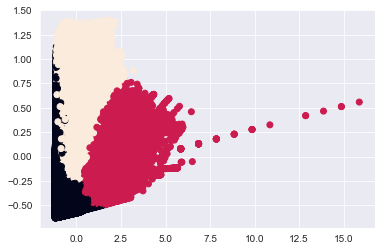

In [126]:
plt.scatter(score[:,0],score[:,1],c=cluster)
plt.show()


In [ ]:
task_data['experence cluster']=cluster

In [ ]:
engagement_met=data.groupby('experence cluster', as_index=False).agg({'TCP_Avg':np.mean,'RTT_Avg':np.mean,'Thru_put_Avg':np.mean})
engagement_met